In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np
X = np.load('/kaggle/input/resnet-features/resnet_features.npy')
y = np.load('/kaggle/input/resnet-features/resnet_labels.npy')

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**SVM**

In [4]:
!pip install pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=74f2654874edb243889d300bbf405a3b271b3d27d78f11a8e37677d8f0e37455
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
Successfully built pyswarm


Stopping search: maximum iterations reached --> 10
Best Parameter (log scale): [-1.43119616]
Final Test Accuracy: 0.8729
Final Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       114
           1       0.79      0.81      0.80        75
           2       0.92      0.92      0.92       267
           3       0.86      0.83      0.85       150

    accuracy                           0.87       606
   macro avg       0.85      0.85      0.85       606
weighted avg       0.87      0.87      0.87       606



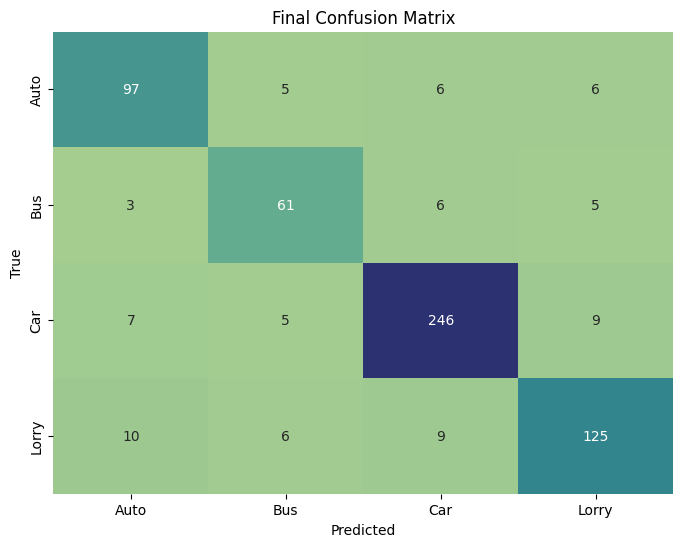

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from pyswarm import pso

# Define the objective function for PSO
def objective_function(params):
    C = 10 ** params[0]  # Exponentiate to convert from log scale

    # Create a linear SVM model with the specified hyperparameters
    svm_model = SVC(kernel='linear', C=C)

    # Train the model on the entire training set
    svm_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    # Return the negative accuracy to be minimized by PSO
    return -accuracy

# Define the search space for hyperparameters in log scale
lb = [-3]  # Lower bounds for log(C)
ub = [3]   # Upper bounds for log(C)

# Perform PSO optimization
best_params, _ = pso(objective_function, lb, ub, swarmsize=10, maxiter=10)

# Print the best parameters found by PSO
print("Best Parameter (log scale):", best_params)

# Convert the best parameter from log scale to linear scale
best_C = 10 ** best_params[0]

# Train the final SVM model with the best parameter
final_svm_model = SVC(kernel='linear', C=best_C)
final_svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_final_pred = final_svm_model.predict(X_test)

# Print final test accuracy
final_accuracy = accuracy_score(y_test, y_final_pred)
print(f'Final Test Accuracy: {final_accuracy:.4f}')

# Print classification report
print('Final Classification Report:')
print(classification_report(y_test, y_final_pred))

# Generate confusion matrix
final_conf_matrix = confusion_matrix(y_test, y_final_pred)

# Plot colored confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(final_conf_matrix, annot=True, fmt='d', cmap='crest', cbar=False,
            xticklabels=['Auto', 'Bus', 'Car', 'Lorry'], yticklabels=['Auto', 'Bus', 'Car', 'Lorry'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Final Confusion Matrix')
plt.show()


**Random Forest**

0.6588131549799778 --- 1
0.6984740564028287 --- 2
0.6563397801823294 --- 3
0.7079756326148078 --- 4
0.7021871006219648 --- 5
0.6959921615404276 --- 6
0.577449944619579 --- 7
0.7145803868109397 --- 8
0.706321036039874 --- 9
0.6877302547499361 --- 10
0.6418837863167759 --- 11
0.7017772855073698 --- 12
0.7104447473800801 --- 13
0.6794666439464939 --- 14
0.7087952628439976 --- 15
0.5452287637386044 --- 16
0.4622066967708955 --- 17
0.6014032546647354 --- 18
0.7129309022748573 --- 19
0.7170614296668655 --- 20
0.6418837863167759 --- 21
0.708382891709977 --- 22
0.7166447985004687 --- 23
0.7026020277754111 --- 24
0.7125142711084604 --- 25
0.6360986623498339 --- 26
0.4622066967708955 --- 27
0.6997069097725143 --- 28
0.7129309022748573 --- 29
0.7211928090653489 --- 30
0.6716213683223993 --- 31
0.7149910539320098 --- 32
0.720362102751981 --- 33
0.7121010479679646 --- 34
0.7211902530459232 --- 35
0.7133398653829769 --- 36
0.5791019851750873 --- 37
0.7133398653829769 --- 38
0.7112788617193491 --- 39

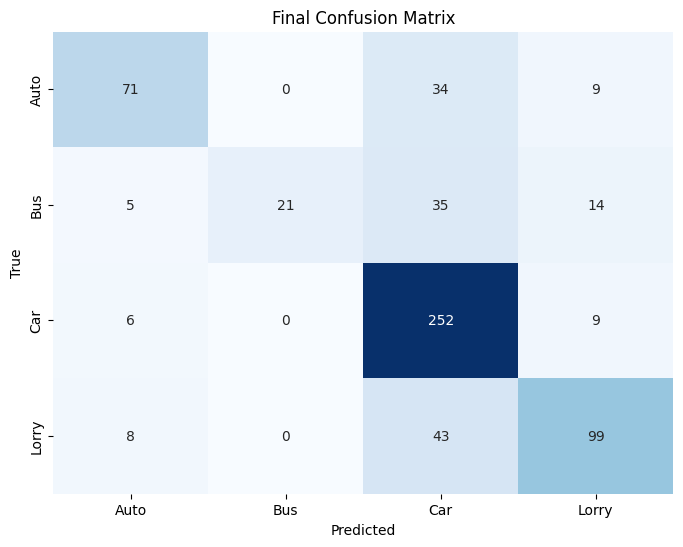

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from pyswarm import pso

j=0

# Define the objective function for PSO
def objective_function(params):
    global j
    j=j+1
    n_estimators, max_depth = params
    
    # Create a Random Forest model with the specified hyperparameters
    rf_model = RandomForestClassifier(n_estimators=int(n_estimators), max_depth=int(max_depth), random_state=42)

    # Perform cross-validation on the training set
    cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
    accuracy = np.mean(cv_scores)
    print(accuracy,"---",j)
    # Return the negative mean accuracy to be minimized by PSO
    return -accuracy

# Define the search space for hyperparameters
lb = [10, 1]    # Lower bounds for n_estimators and max_depth
ub = [200, 20]   # Upper bounds for n_estimators and max_depth

# Perform PSO optimization
best_params, _ = pso(objective_function, lb, ub, swarmsize=10, maxiter=10)

# Print the best parameters found by PSO
best_n_estimators, best_max_depth = best_params
print("Best Parameters:")
print(f"n_estimators: {best_n_estimators}, max_depth: {best_max_depth}")

# Train the final RandomForestClassifier with the best parameters
final_rf_model = RandomForestClassifier(n_estimators=int(best_n_estimators), max_depth=int(best_max_depth), random_state=42)
final_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_final_pred = final_rf_model.predict(X_test)

# Print final test accuracy
final_accuracy = accuracy_score(y_test, y_final_pred)
print(f'Final Test Accuracy: {final_accuracy:.4f}')

# Print classification report
print('Final Classification Report:')
print(classification_report(y_test, y_final_pred))

# Generate confusion matrix
final_conf_matrix = confusion_matrix(y_test, y_final_pred)

# Plot colored confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(final_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Auto', 'Bus', 'Car', 'Lorry'], yticklabels=['Auto', 'Bus', 'Car', 'Lorry'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Final Confusion Matrix')
plt.show()


**Logistic Regression**

0.8531353135313532 ---- 1
0.8613861386138614 ---- 2
0.8514851485148515 ---- 3
0.858085808580858 ---- 4
0.863036303630363 ---- 5
0.8613861386138614 ---- 6
0.8547854785478548 ---- 7
0.8547854785478548 ---- 8
0.7953795379537953 ---- 9
0.8646864686468647 ---- 10
0.8564356435643564 ---- 11
0.8547854785478548 ---- 12
0.8547854785478548 ---- 13
0.8564356435643564 ---- 14
0.8613861386138614 ---- 15
0.858085808580858 ---- 16
0.8597359735973598 ---- 17
0.8597359735973598 ---- 18
0.7953795379537953 ---- 19
0.8663366336633663 ---- 20
0.8514851485148515 ---- 21
0.8597359735973598 ---- 22
0.8514851485148515 ---- 23
0.858085808580858 ---- 24
0.8613861386138614 ---- 25
0.8514851485148515 ---- 26
0.8646864686468647 ---- 27
0.8531353135313532 ---- 28
0.8036303630363036 ---- 29
0.8646864686468647 ---- 30
0.8547854785478548 ---- 31
0.8646864686468647 ---- 32
0.8547854785478548 ---- 33
0.8597359735973598 ---- 34
0.8613861386138614 ---- 35
0.8531353135313532 ---- 36
0.863036303630363 ---- 37
0.8564356435643

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8547854785478548 ---- 43
0.8613861386138614 ---- 44
0.863036303630363 ---- 45
0.8663366336633663 ---- 46
0.863036303630363 ---- 47
0.8613861386138614 ---- 48
0.8613861386138614 ---- 49
0.8646864686468647 ---- 50
0.8514851485148515 ---- 51
0.863036303630363 ---- 52
0.8564356435643564 ---- 53
0.8613861386138614 ---- 54
0.8646864686468647 ---- 55
0.863036303630363 ---- 56
0.863036303630363 ---- 57
0.863036303630363 ---- 58
0.8646864686468647 ---- 59
0.8646864686468647 ---- 60
0.8597359735973598 ---- 61
0.863036303630363 ---- 62
0.8547854785478548 ---- 63
0.8613861386138614 ---- 64
0.8663366336633663 ---- 65
0.863036303630363 ---- 66
0.8663366336633663 ---- 67
0.863036303630363 ---- 68
0.8646864686468647 ---- 69
0.8646864686468647 ---- 70
0.8646864686468647 ---- 71
0.8646864686468647 ---- 72


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8547854785478548 ---- 73
0.863036303630363 ---- 74
0.8663366336633663 ---- 75
0.8646864686468647 ---- 76
0.8646864686468647 ---- 77
0.8646864686468647 ---- 78
0.8646864686468647 ---- 79
0.8646864686468647 ---- 80
0.863036303630363 ---- 81
0.863036303630363 ---- 82
0.863036303630363 ---- 83
0.863036303630363 ---- 84
0.8663366336633663 ---- 85
0.8663366336633663 ---- 86
0.8646864686468647 ---- 87
0.8646864686468647 ---- 88
0.8646864686468647 ---- 89
0.8646864686468647 ---- 90
0.863036303630363 ---- 91
0.8646864686468647 ---- 92
0.8646864686468647 ---- 93
0.863036303630363 ---- 94
0.8646864686468647 ---- 95
0.863036303630363 ---- 96
0.8646864686468647 ---- 97
0.8646864686468647 ---- 98
0.8663366336633663 ---- 99
0.8663366336633663 ---- 100
0.863036303630363 ---- 101
0.8663366336633663 ---- 102
0.863036303630363 ---- 103
0.863036303630363 ---- 104
0.8646864686468647 ---- 105
0.8663366336633663 ---- 106
0.8646864686468647 ---- 107
0.8646864686468647 ---- 108
0.8646864686468647 ---- 109
0.

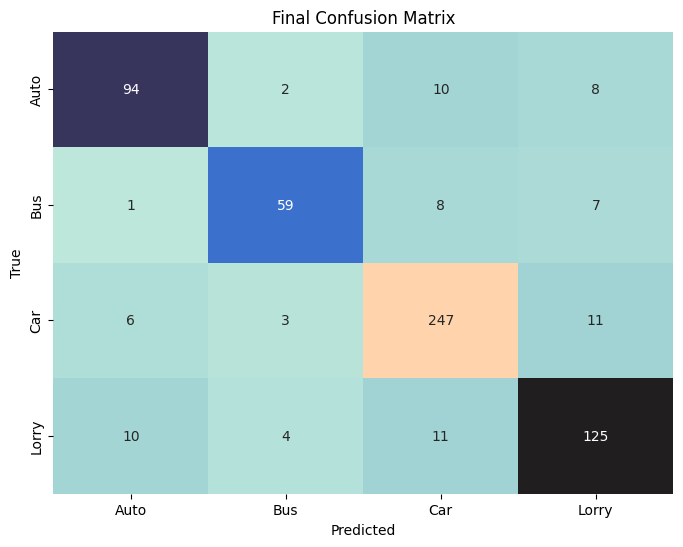

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from pyswarm import pso
j=0
# Define the objective function for PSO
def objective_function(params):
    global j
    j=j+1
    C, = params  # C is the regularization parameter for Logistic Regression
    
    # Create a Logistic Regression model with the specified hyperparameters
    lr_model = LogisticRegression(C=10 ** C, max_iter=1000, random_state=42)

    # Train the model on the entire training set
    lr_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = lr_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy,"----",j)
    # Return the negative accuracy to be minimized by PSO
    return -accuracy

# Define the search space for hyperparameters in log scale
lb = [-3]  # Lower bounds for log(C)
ub = [3]   # Upper bounds for log(C)

# Perform PSO optimization
best_params, _ = pso(objective_function, lb, ub, swarmsize=10, maxiter=10)

# Print the best parameter found by PSO
best_C = 10 ** best_params[0]
print("Best Parameter (log scale):", best_params)

# Train the final Logistic Regression model with the best parameter
final_lr_model = LogisticRegression(C=best_C, max_iter=1000, random_state=42)
final_lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_final_pred = final_lr_model.predict(X_test)

# Print final test accuracy
final_accuracy = accuracy_score(y_test, y_final_pred)
print(f'Final Test Accuracy: {final_accuracy:.4f}')

# Print classification report
print('Final Classification Report:')
print(classification_report(y_test, y_final_pred))

# Generate confusion matrix
final_conf_matrix = confusion_matrix(y_test, y_final_pred)

# Plot colored confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(final_conf_matrix, annot=True, fmt='d', cmap='icefire', cbar=False,
            xticklabels=['Auto', 'Bus', 'Car', 'Lorry'], yticklabels=['Auto', 'Bus', 'Car', 'Lorry'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Final Confusion Matrix')
plt.show()


**Naive Bayes**

Cross-Validation Scores: [0.30103093 0.29132231 0.28512397 0.27479339 0.29958678]
Mean Accuracy: 0.2904
Test Accuracy: 0.2937
Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.18      0.20       114
           1       0.32      0.12      0.17        75
           2       0.73      0.13      0.23       267
           3       0.26      0.75      0.39       150

    accuracy                           0.29       606
   macro avg       0.38      0.30      0.25       606
weighted avg       0.47      0.29      0.25       606



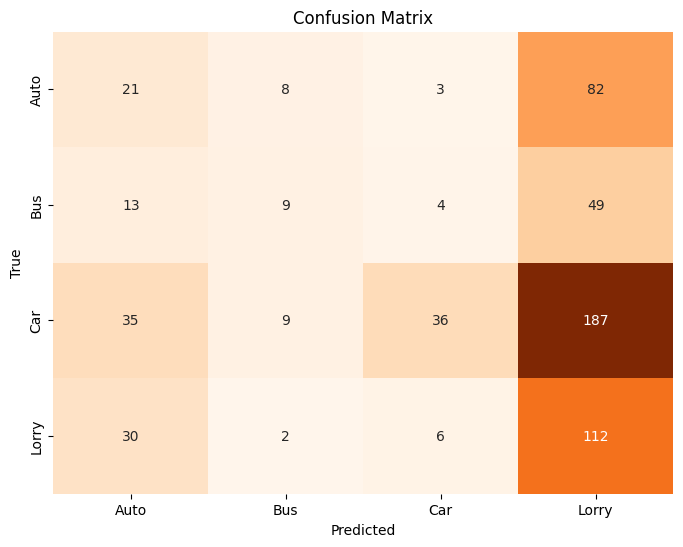

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Create a Gaussian Naive Bayes model
nb_model = GaussianNB(var_smoothing=1e-5)

# Perform cross-validation on the training set
cv_scores = cross_val_score(nb_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.4f}".format(np.mean(cv_scores)))

# Train the model on the entire training set
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Print test accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot colored confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=['Auto', 'Bus', 'Car', 'Lorry'], yticklabels=['Auto', 'Bus', 'Car', 'Lorry'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


0.2722772277227723 ---- 1
0.2722772277227723 ---- 2
0.2706270627062706 ---- 3
0.27887788778877887 ---- 4
0.2739273927392739 ---- 5
0.2706270627062706 ---- 6
0.2722772277227723 ---- 7
0.2706270627062706 ---- 8
0.2739273927392739 ---- 9
0.2722772277227723 ---- 10
0.2722772277227723 ---- 11
0.2722772277227723 ---- 12
0.28052805280528054 ---- 13
0.2755775577557756 ---- 14
0.27887788778877887 ---- 15
0.2722772277227723 ---- 16
0.26897689768976896 ---- 17
0.2739273927392739 ---- 18
0.28052805280528054 ---- 19
0.2722772277227723 ---- 20
0.2706270627062706 ---- 21
0.2722772277227723 ---- 22
0.3613861386138614 ---- 23
0.2755775577557756 ---- 24
0.29207920792079206 ---- 25
0.2722772277227723 ---- 26
0.2755775577557756 ---- 27
0.27887788778877887 ---- 28
0.27722772277227725 ---- 29
0.26897689768976896 ---- 30
0.2755775577557756 ---- 31
0.2722772277227723 ---- 32
0.3613861386138614 ---- 33
0.28052805280528054 ---- 34
0.3613861386138614 ---- 35
0.2722772277227723 ---- 36
0.27887788778877887 ---- 37

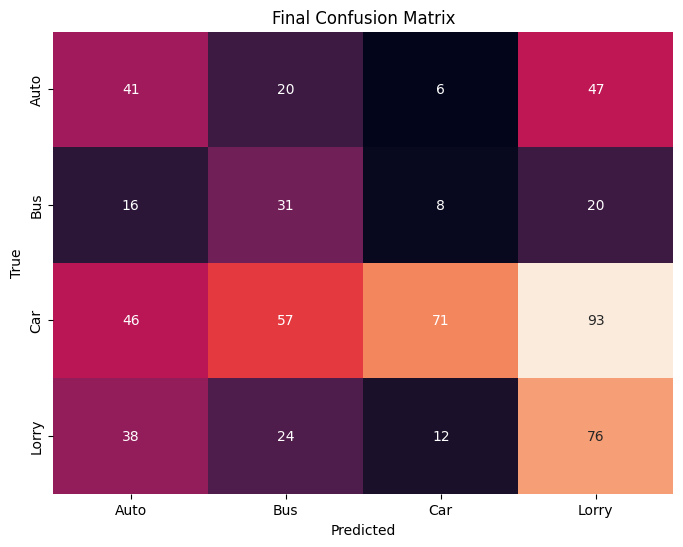

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from pyswarm import pso

# Load or define your dataset (X_train, X_test, y_train, y_test)

j = 0
# Define the objective function for PSO
def objective_function(params):
    global j
    j = j + 1
    var_smoothing, = params
    
    # Create a Gaussian Naive Bayes model with the specified hyperparameters
    nb_model = GaussianNB(var_smoothing=var_smoothing)

    # Train the model on the entire training set
    nb_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = nb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy, "----", j)
    # Return the negative accuracy to be minimized by PSO
    return -accuracy

# Define the search space for hyperparameters
lb = [1e-10]  # Lower bounds for var_smoothing
ub = [1.0]    # Upper bounds for var_smoothing

# Perform PSO optimization
best_params, _ = pso(objective_function, lb, ub, swarmsize=10, maxiter=10)

# Print the best parameter found by PSO
best_var_smoothing = best_params[0]
print("Best Parameter:", best_var_smoothing)

# Train the final Gaussian Naive Bayes model with the best parameter
final_nb_model = GaussianNB(var_smoothing=best_var_smoothing)
final_nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_final_pred = final_nb_model.predict(X_test)

# Print final test accuracy
final_accuracy = accuracy_score(y_test, y_final_pred)
print(f'Final Test Accuracy: {final_accuracy:.4f}')

# Print classification report
print('Final Classification Report:')
print(classification_report(y_test, y_final_pred))

# Generate confusion matrix
final_conf_matrix = confusion_matrix(y_test, y_final_pred)

# Plot colored confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(final_conf_matrix, annot=True, fmt='d', cmap='rocket', cbar=False,
            xticklabels=['Auto', 'Bus', 'Car', 'Lorry'], yticklabels=['Auto', 'Bus', 'Car', 'Lorry'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Final Confusion Matrix')
plt.show()


**KNN**

Stopping search: maximum iterations reached --> 10
Best n_neighbours -> 2
Final Test Accuracy: 0.7046
Final Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.76      0.69       114
           1       0.48      0.69      0.57        75
           2       0.78      0.85      0.81       267
           3       0.89      0.41      0.56       150

    accuracy                           0.70       606
   macro avg       0.69      0.68      0.66       606
weighted avg       0.74      0.70      0.70       606



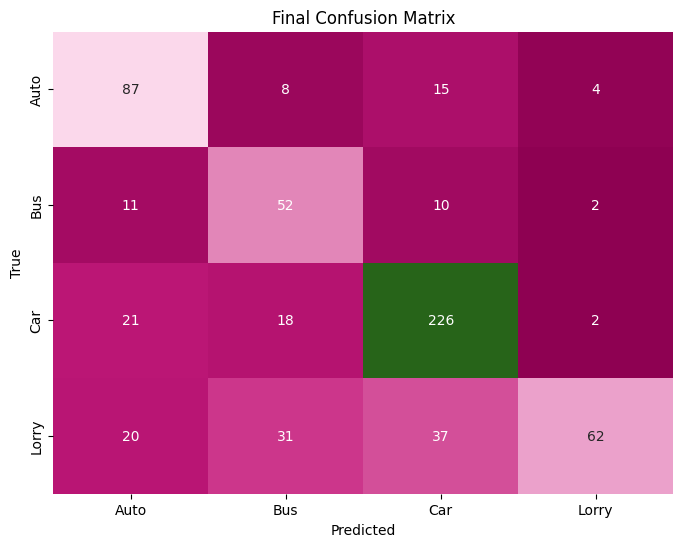

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from pyswarm import pso

# Define the objective function for PSO optimization
def objective_function(params):
    n_neighbors = int(params[0])  # Ensure the number of neighbors is an integer
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    # Since pso minimizes the objective function, we need to minimize the negative accuracy
    return -accuracy

# Define the search space for PSO
lb = [2]  # Lower bounds for the number of neighbors
ub = [20]  # Upper bounds for the number of neighbors

# Perform PSO optimization
best_params, _ = pso(objective_function, lb, ub, swarmsize=10, maxiter=10)

# Extract the optimized hyperparameters
best_n_neighbors = int(best_params[0])

# Train the final K-Nearest Neighbors model with the optimized hyperparameters
final_knn_model = KNeighborsClassifier(n_neighbors=best_n_neighbors)
final_knn_model.fit(X_train, y_train)
print("Best n_neighbours ->",best_n_neighbors)
# Make predictions on the test set
y_final_pred = final_knn_model.predict(X_test)

# Print final test accuracy
final_accuracy = accuracy_score(y_test, y_final_pred)
print(f'Final Test Accuracy: {final_accuracy:.4f}')

# Print classification report
print('Final Classification Report:')
print(classification_report(y_test, y_final_pred))

# Generate confusion matrix
final_conf_matrix = confusion_matrix(y_test, y_final_pred)

# Plot colored confusion matrix for the optimized model
plt.figure(figsize=(8, 6))
sns.heatmap(final_conf_matrix, annot=True, fmt='d', cmap='PiYG', cbar=False,
            xticklabels=['Auto', 'Bus', 'Car', 'Lorry'], yticklabels=['Auto', 'Bus', 'Car', 'Lorry'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Final Confusion Matrix')
plt.show()


**Decision tree**

0.6138613861386139 --- 1
0.5874587458745875 --- 2
0.6287128712871287 --- 3
0.5742574257425742 --- 4
0.5792079207920792 --- 5
0.6320132013201321 --- 6
0.5874587458745875 --- 7
0.6089108910891089 --- 8
0.6056105610561056 --- 9
0.5808580858085809 --- 10
0.6336633663366337 --- 11
0.5874587458745875 --- 12
0.6056105610561056 --- 13
0.6039603960396039 --- 14
0.570957095709571 --- 15
0.6320132013201321 --- 16
0.5874587458745875 --- 17
0.5462046204620462 --- 18
0.6171617161716172 --- 19
0.6056105610561056 --- 20
0.6287128712871287 --- 21
0.6188118811881188 --- 22
0.6056105610561056 --- 23
0.5874587458745875 --- 24
0.594059405940594 --- 25
0.6270627062706271 --- 26
0.5874587458745875 --- 27
0.6254125412541254 --- 28
0.6204620462046204 --- 29
0.6336633663366337 --- 30
0.6336633663366337 --- 31
0.5874587458745875 --- 32
0.599009900990099 --- 33
0.6188118811881188 --- 34
0.599009900990099 --- 35
0.6270627062706271 --- 36
0.6188118811881188 --- 37
0.6336633663366337 --- 38
0.6171617161716172 --- 39

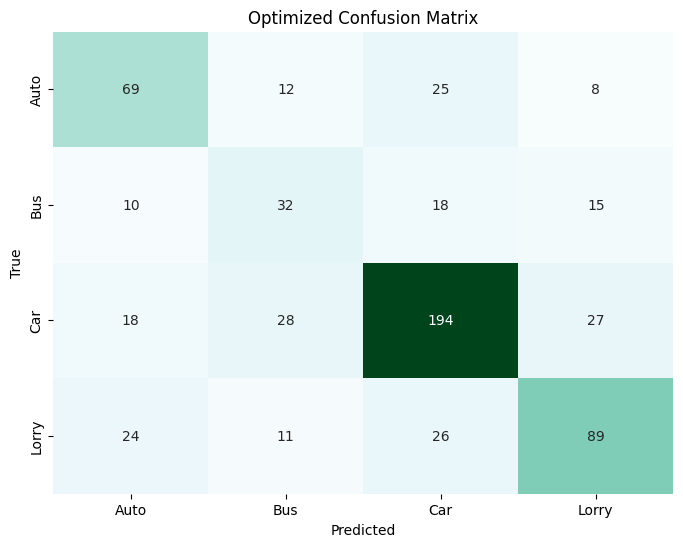

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from pyswarm import pso

p = 0

# Define the objective function for PSO optimization
def objective_function(params):
    global p
    p += 1
    max_depth, min_samples_split, min_samples_leaf = params
    dt_model = DecisionTreeClassifier(
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf),
        random_state=42
    )
    dt_model.fit(X_train, y_train)
    y_pred = dt_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy, "---", p)
    # Since pso minimizes the objective function, we need to minimize 1 - accuracy
    return 1 - accuracy

# Define the search space for PSO
lb = [3, 2, 1]  # Lower bounds for max_depth, min_samples_split, min_samples_leaf
ub = [20, 10, 10]  # Upper bounds for max_depth, min_samples_split, min_samples_leaf

# Set the maximum number of iterations for PSO
max_iter = 10

# Set the swarm size for PSO
swarm_size = 10

# Perform PSO optimization with specified maximum iterations and swarm size
best_params, _ = pso(objective_function, lb, ub, maxiter=max_iter, swarmsize=swarm_size)

# Extract the optimized hyperparameters
best_max_depth, best_min_samples_split, best_min_samples_leaf = best_params

# Print the best parameters found by PSO
print("Best Parameters (Optimized):")
print("Max Depth:", int(best_max_depth))
print("Min Samples Split:", int(best_min_samples_split))
print("Min Samples Leaf:", int(best_min_samples_leaf))

# Train the Decision Tree model with the optimized hyperparameters
optimized_dt_model = DecisionTreeClassifier(
    max_depth=int(best_max_depth),
    min_samples_split=int(best_min_samples_split),
    min_samples_leaf=int(best_min_samples_leaf),
    random_state=42
)
optimized_dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_optimized = optimized_dt_model.predict(X_test)

# Print test accuracy
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print(f'\nOptimized Test Accuracy: {accuracy_optimized:.4f}')

# Print classification report
print('Optimized Classification Report:')
print(classification_report(y_test, y_pred_optimized))

# Generate confusion matrix
conf_matrix_optimized = confusion_matrix(y_test, y_pred_optimized)

# Plot colored confusion matrix for the optimized model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_optimized, annot=True, fmt='d', cmap='BuGn', cbar=False,
            xticklabels=['Auto', 'Bus', 'Car', 'Lorry'], yticklabels=['Auto', 'Bus', 'Car', 'Lorry'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Optimized Confusion Matrix')
plt.show()
